# 1.Introduction

В условиях современного интернета, где повседневная деятельность людей тесно связана с использованием различных онлайн-сервисов и приложений, безопасность данных становится приоритетной задачей. Веб-атаки, такие как DDoS, фишинг и SQL-инъекции, становятся всё более сложными и разнообразными, что делает эффективную защиту сети важной не только для организаций, но и для обычных пользователей.

Целью данного проекта является анализ различных типов кибератак с использованием датасета "Cyber Security Attacks". Для достижения этой цели мы провели серию запросов, направленных на выявление ключевых характеристик атак и особенностей интернет-трафика.

# 2. Data description

* Protocol: Протокол связи, используемый для пакета (например, TCP или UDP).
* Flag:  Флаг, связанный с пакетом (например, SYN, ACK, RST, FIN).
* Packet: Тип передаваемого пакета (например, HTTP, DNS, SSH, FTP, NTP).
* Sender ID: Уникальный идентификатор для объекта отправителя.
* Receiver ID: Уникальный идентификатор для объекта получателя.
* Source IP Address: IP-адрес исходного объекта.
* Destination IP Address:  IP-адрес объекта назначения.
* Source Port: Номер порта на исходном объекте.
* Destination Port:  Номер порта на объекте назначения.
* Packet Size: Размер пакета в байтах.
* Target Variable: Потенциальная угроза безопасности, связанная с пакетом (например, фишинг, DoS, Man-in-the-Middle, DDoS, SQL-инъекция, межсайтовый скриптинг, программы-вымогатели, атаки с использованием паролей, эксплойты нулевого дня).

In [1]:
import pandas as pd
df = pd.read_csv('/content/cyberthreat.csv')
df.head()

,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,1024,Phishing
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,512,DoS
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,256,Man-in-the-Middle
3,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,128,DDoS
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,2048,SQL Injection


In [ ]:
df.shape

(750, 11)

In [ ]:
df.tail()

,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
745,TCP,SYN,FTP,567890,890123,192.168.1.5,10.0.0.10,21,12345,512,Ransomware
746,UDP,ACK,DNS,901234,678901,10.0.0.15,192.168.0.2,12345,53,256,Password Attacks
747,TCP,SYN,SSH,234567,456789,192.168.0.5,10.0.0.10,22,12345,256,Zero-Day Exploits
748,UDP,ACK,NTP,456789,234567,10.0.0.8,192.168.0.5,123,12345,128,Phishing
749,TCP,RST,FTP,678901,901234,192.168.1.10,10.0.0.15,20,12345,2048,DoS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Protocol                750 non-null    object
 1   Flag                    750 non-null    object
 2   Packet                  750 non-null    object
 3   Sender ID               750 non-null    int64 
 4   Receiver ID             750 non-null    int64 
 5   Source IP Address       750 non-null    object
 6   Destination IP Address  750 non-null    object
 7   Source Port             750 non-null    int64 
 8   Destination Port        750 non-null    int64 
 9   Packet Size             750 non-null    int64 
 10  Target Variable         750 non-null    object
dtypes: int64(5), object(6)
memory usage: 64.6+ KB


In [ ]:
df.Protocol.unique()

array(['TCP', 'UDP'], dtype=object)

In [ ]:
df.Flag.unique()

array(['SYN', 'ACK', 'RST', 'FIN'], dtype=object)

In [ ]:
df.Packet.unique()

array(['HTTP', 'DNS', 'SSH', 'NTP', 'FTP', 'SNMP', 'HTTPS', 'DHCP',
       'SMTP'], dtype=object)

# 3. Research question


* 1.Как часто разные типы атак используют определённые интернет-протоколы (TCP или UDP)?
* 2.Анализ типов атак и их связи с размером пакета
* 3.Какие типы интернет-трафика связаны с конкретными атаками?
* 4.Идентификация аномальных паттернов трафика
* 5.Какой отправитель отправил наибольшее количество запросов

# 4. Data preparation

In [ ]:
#importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.isnull().sum()

,0
protocol,0
flag,0
packet,0
sender_id,0
receiver_id,0
source_ip_address,0
destination_ip_address,0
source_port,0
destination_port,0
packet_size,0


In [ ]:
df.describe(include='all')

,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
count,750,750,750,750.000000,750.000000,750,750,750.000000,750.000000,750.000000,750
unique,2,4,9,NaN,NaN,10,10,NaN,NaN,NaN,9
top,TCP,ACK,FTP,NaN,NaN,10.0.0.2,192.168.1.10,NaN,NaN,NaN,Phishing
freq,378,372,150,NaN,NaN,150,180,NaN,NaN,NaN,96
mean,NaN,NaN,NaN,576178.760000,582752.624000,NaN,NaN,3155.512000,9297.088000,959.488000,NaN
std,NaN,NaN,NaN,286422.590855,287956.815104,NaN,NaN,5282.061308,5311.018757,1154.034583,NaN
min,NaN,NaN,NaN,123456.000000,123456.000000,NaN,NaN,20.000000,20.000000,128.000000,NaN
25%,NaN,NaN,NaN,345678.000000,345678.000000,NaN,NaN,25.000000,12345.000000,256.000000,NaN
50%,NaN,NaN,NaN,567890.000000,678901.000000,NaN,NaN,161.000000,12345.000000,512.000000,NaN
75%,NaN,NaN,NaN,789012.000000,890123.000000,NaN,NaN,443.000000,12345.000000,1024.000000,NaN


In [ ]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.head()

,protocol,flag,packet,sender_id,receiver_id,source_ip_address,destination_ip_address,source_port,destination_port,packet_size,target_variable
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,1024,Phishing
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,512,DoS
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,256,Man-in-the-Middle
3,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,128,DDoS
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,2048,SQL Injection


#5. Data analysis and visualisation

### 5.1 Q1:
Здесь мы соеденили два столбца, и посчитали количесво протоколов TCP/UDP для каждого вида атак, и показали его в процентном соотношении.

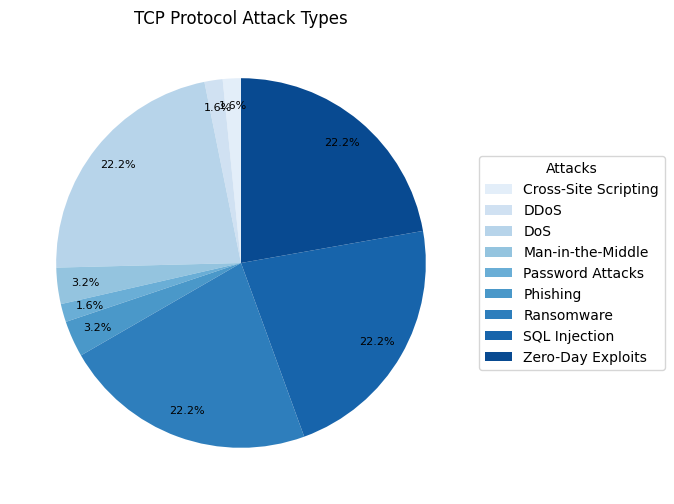

In [ ]:
attack_types = pd.crosstab(df['protocol'], df['target_variable'])
tcp_data = attack_types.loc['TCP']
udp_data = attack_types.loc['UDP']

# График для TCP
plt.figure(figsize=(6, 6))
wedges1, texts1, autotexts1 = plt.pie(tcp_data, autopct='%1.1f%%', startangle=90,
                                      colors=sns.color_palette("Blues", len(tcp_data)), pctdistance=0.85,
                                      textprops={'fontsize': 8}, labeldistance=1.2)
# Добавляем метки на внешний радиус
for text in texts1:
    text.set_fontsize(8)
    text.set_horizontalalignment('center')

plt.title('TCP Protocol Attack Types')
plt.legend(wedges1, tcp_data.index, title="Attacks", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

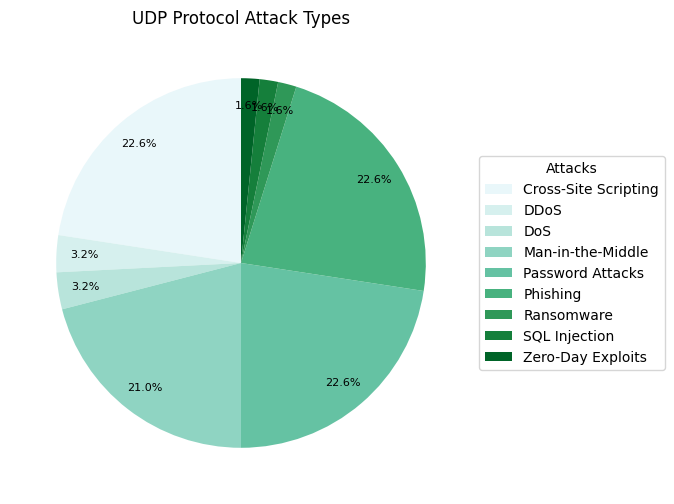

In [ ]:
# График для UDP
plt.figure(figsize=(6, 6))
wedges2, texts2, autotexts2 = plt.pie(udp_data, autopct='%1.1f%%', startangle=90,
                                      colors=sns.color_palette("BuGn", len(udp_data)), pctdistance=0.85,
                                      textprops={'fontsize': 8}, labeldistance=1.2)
# Добавляем метки на внешний радиус
for text in texts2:
    text.set_fontsize(8)
    text.set_horizontalalignment('center')
plt.title('UDP Protocol Attack Types')
plt.legend(wedges2, udp_data.index, title="Attacks", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

### 5.2 Q2
Видим какие размеры файла используются чаще всего для разных видов атак

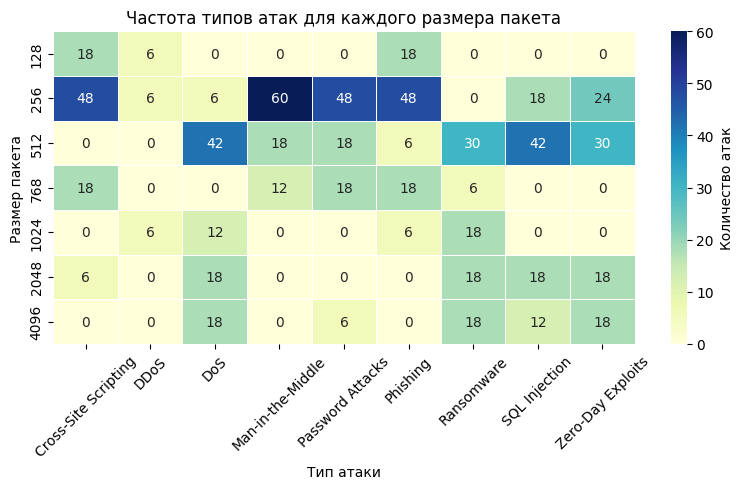

In [ ]:
attack_by_size = df.groupby(['packet_size', 'target_variable']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 5))

# Строим тепловую карту
sns.heatmap(attack_by_size, annot=True, cmap="YlGnBu", fmt='d', linewidths=0.5, cbar_kws={'label': 'Количество атак'})
plt.title('Частота типов атак для каждого размера пакета')
plt.xlabel('Тип атаки')
plt.ylabel('Размер пакета')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




### 5.3 Q3:
 В результате получаем какие интернет трафики используются чаще всего, для разных типов атак

<Figure size 400x200 with 0 Axes>

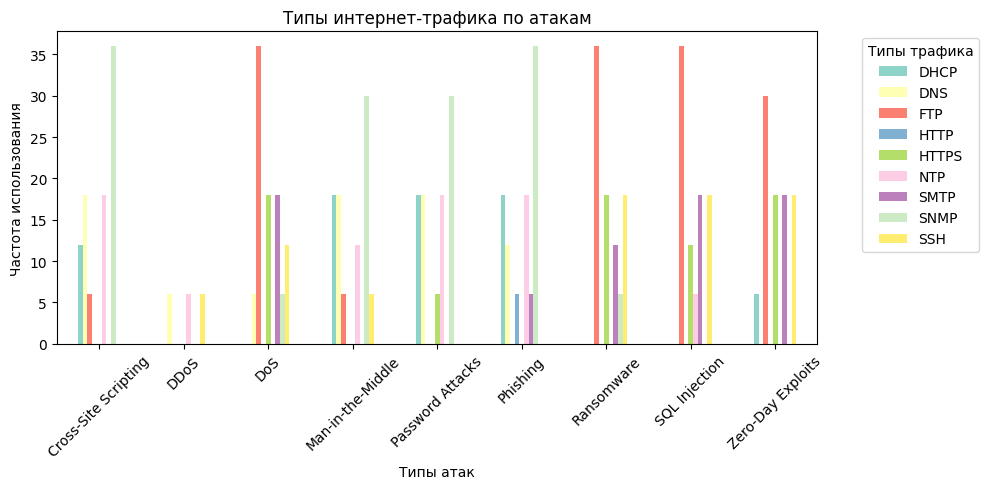

In [ ]:
# Создаем кросс-таблицу для типов атак и типов пакетов
attack_traffic = pd.crosstab(df['target_variable'], df['packet'])

# Визуализируем с помощью гистограммы
plt.figure(figsize=(4, 2))
attack_traffic.plot(kind='bar', stacked=False, figsize=(10,5), colormap="Set3")

plt.title('Типы интернет-трафика по атакам')
plt.xlabel('Типы атак')
plt.ylabel('Частота использования')
plt.xticks(rotation=45)
plt.legend(title='Типы трафика', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### 5.4 Q4:
Здесь мы анализируем, сколько уникальных Destination IP приходится на каждый Source IP. подсчитываем, сколько раз каждый Source IP встречается в датасете. В данном случае 10.0.0.2 делает 150 запросов.

In [ ]:
df['source_ip_address'].unique()

array(['192.168.0.1', '10.0.0.2', '192.168.1.10', '10.0.0.5',
       '192.168.0.5', '10.0.0.8', '192.168.1.5', '10.0.0.10',
       '192.168.0.2', '10.0.0.15'], dtype=object)

In [ ]:
unique_source_ips = df['source_ip_address'].nunique()
unique_destination_ips = df['destination_ip_address'].nunique()

# Анализируем, сколько Source IP делает запросы на множество Destination IP
source_ip_to_destination_count = df.groupby('source_ip_address')['destination_ip_address'].nunique()

# Выявляем аномалии: слишком много уникальных Destination IP для одного Source IP
threshold = source_ip_to_destination_count.quantile(0.95)  # 95-й перцентиль
anomalous_source_ips = source_ip_to_destination_count[source_ip_to_destination_count > threshold]

# Анализируем, сколько запросов делает один Source IP
source_ip_request_count = df['source_ip_address'].value_counts()

# Выявляем аномалии: слишком много запросов с одного IP
request_threshold = source_ip_request_count.quantile(0.95)
anomalous_requests = source_ip_request_count[source_ip_request_count > request_threshold]

# Результаты
print(f"Уникальных Source IP: {unique_source_ips}")
print(f"Уникальных Destination IP: {unique_destination_ips}")
print(f"Аномальные Source IP по количеству Destination IP: {anomalous_source_ips}")
print(f"Аномальные Source IP по количеству запросов: {anomalous_requests}")



Уникальных Source IP: 10
Уникальных Destination IP: 10
Аномальные Source IP по количеству Destination IP: source_ip_address
192.168.1.10    3
Name: destination_ip_address, dtype: int64
Аномальные Source IP по количеству запросов: source_ip_address
10.0.0.2    150
Name: count, dtype: int64


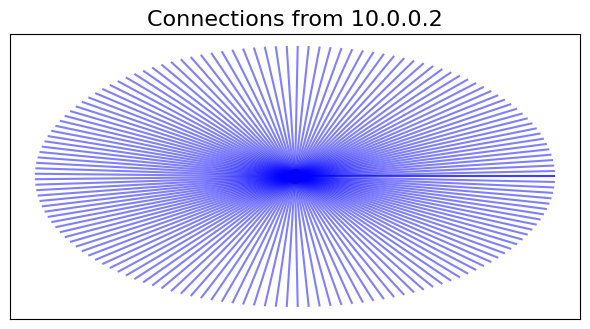

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения эллиптической кривой
def plot_ellipse(ax, source_ip, num_lines, title):
    # Параметры эллипса
    a = 1  # полуось вдоль оси X
    b = 0.5  # полуось вдоль оси Y

    # Углы для линий
    angles = np.linspace(0, 2 * np.pi, num_lines)

    # Создание координат точек
    x = a * np.cos(angles)
    y = b * np.sin(angles)

    # Рисуем линии от центральной точки к каждой точке на эллипсе
    for i in range(num_lines):
        ax.plot([0, x[i]], [0, y[i]], color='blue', alpha=0.5)

    # Добавляем центральную точку с меткой
    ax.scatter([0], [0], color='red', s=100, label=source_ip)

    # Оформление
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(title, size=16)
    ax.set_xticks([])
    ax.set_yticks([])

# Создаем окно для одного подграфика
fig, ax = plt.subplots(figsize=(6, 6))  # Один график

# График: Точка с 150 кривыми
plot_ellipse(ax, "10.0.0.2", 150, 'Connections from 10.0.0.2')

# Покажем график
plt.tight_layout()  # Это улучшает расположение элементов
plt.show()



### 5.5 Q5:
5.Какой отправитель отправил наибольшее количество запросов

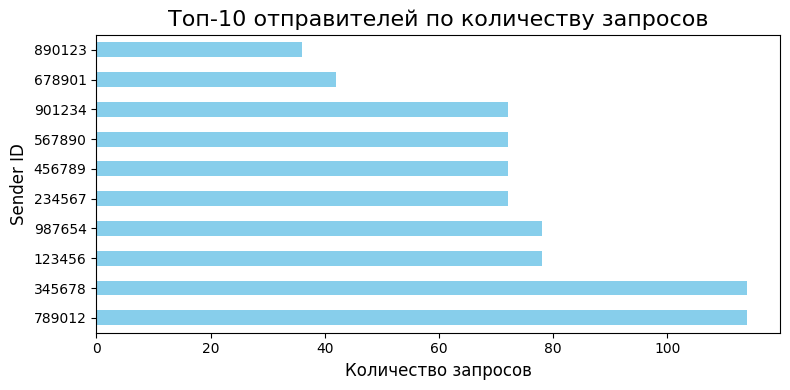

In [ ]:
# Подсчитаем, сколько раз каждый Sender ID встречается в данных
sender_counts = df['sender_id'].value_counts()

# Подготовим данные для графика
top_senders = sender_counts.head(10)

# Построим горизонтальную гистограмму
plt.figure(figsize=(8, 4))
top_senders.plot(kind='barh', color='skyblue')

# Оформление графика
plt.title('Топ-10 отправителей по количеству запросов', fontsize=16)
plt.xlabel('Количество запросов', fontsize=12)
plt.ylabel('Sender ID', fontsize=12)
plt.tight_layout()

# Показать график
plt.show()


## Запрос: Преобразовать такие категориальные признаки, как Protocol, Flag, Packet, в числовые значения.

In [ ]:
# Пример для One-Hot Encoding
df = pd.get_dummies(df, columns=['Protocol', 'Flag', 'Packet'])
#вот это второй раз запускать не надо, Для ML чтоб удобно было переделала
